In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import cv2
import os
import tensorflow as tf
from glob import glob
from tqdm import tqdm
import time

In [28]:
height = 1024//4
width = 1280//4

In [14]:
dataset_path = './PS3_Train/PS3_Train/seq_11/'
model_path = './PS3_Train/PS3_Train/seq_1/model/unet.h5'
save_path = './PS3_Train/PS3_Train/seq_1/save'

In [9]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [11]:
create_dir(save_path)

In [12]:
model = tf.keras.models.load_model(model_path)

In [13]:
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 320, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 320, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

In [15]:
test_x = glob(os.path.join(dataset_path, 'frames', '*'))

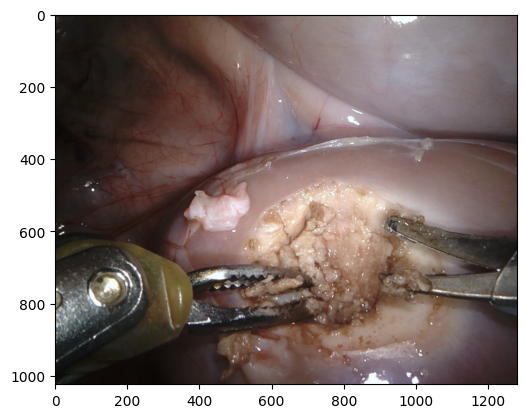

In [20]:
img = cv2.imread(test_x[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [34]:
time_taken = []
for x in tqdm(test_x):
    name = x.split('/')[-1]

    x = cv2.imread(x, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (width, height))
    x = x/255.0
    x = np.expand_dims(x, axis=0)

    start_time = time.time()
    p = model.predict(x)[0]
    total_time = time.time() - start_time
    time_taken.append(total_time)
    
    p = p*255
    cv2.imwrite(os.path.join(save_path, name), p)
    break

  0%|                                                         | 0/149 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|                                                         | 0/149 [00:00<?, ?it/s]
